In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

# Task a

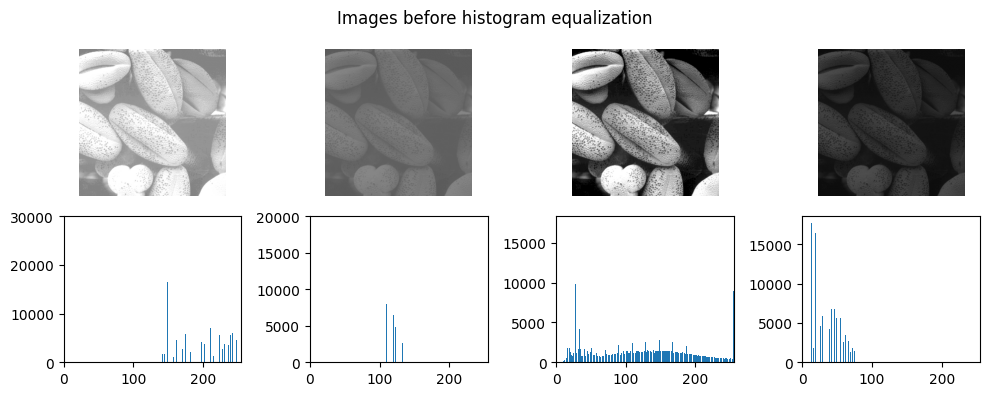

In [2]:
im1 = np.array( Image.open("Data/Fig0316(1)(top_left).tif") ) 
im2 = np.array( Image.open("Data/Fig0316(2)(2nd_from_top).tif") )
im3 = np.array( Image.open("Data/Fig0316(3)(third_from_top).tif") )
im4 = np.array( Image.open("Data/Fig0316(4)(bottom_left).tif") )

## Plot the images and their histograms:
fig1,ax1 = plt.subplots(2,4, figsize=(10,4))

ax1[0,0].imshow(im1, cmap="gray", vmin=0, vmax=255)
ax1[0,1].imshow(im2, cmap="gray", vmin=0, vmax=255)
ax1[0,2].imshow(im3, cmap="gray", vmin=0, vmax=255)
ax1[0,3].imshow(im4, cmap="gray", vmin=0, vmax=255)

ax1[1,0].hist(im1.flatten(), bins=255)
ax1[1,1].hist(im2.flatten(), bins=255)
ax1[1,2].hist(im3.flatten(), bins=255)
ax1[1,3].hist(im4.flatten(), bins=255)

for a in ax1[0,:]: a.set_axis_off()
for a in ax1[1,:]: a.set_xlim(0, 255)
fig1.suptitle("Images before histogram equalization")
plt.tight_layout()

# Task B

In [3]:
def histogramEqualization(im):
    #### Function to perform histogram equalization

    ## Initialize the output image as a copy of the input
    new_im = np.copy(im)
    
    ## Find the image shape and all the unique pixel values
    M,N = im.shape
    pixel_values = np.unique(im)

    ## Initialize the probability masses of each pixel value
    p_r = []

    ## Loop through all the pixel values in the image
    for rk in pixel_values:

        ## Compute the probability mass of the current pixel value
        #  and store it in the probability mass vector
        p_rk = (im==rk).sum() / (M*N)
        p_r.append(p_rk)

        ## Compute the transformed pixel value based on equation 
        #  (3-15) from the textbook
        s_k = 255 * sum(p_r)
        
        ## Replace the pixel values in the output image with the 
        #  transformed intensity
        new_im[im==rk] = s_k

    return new_im

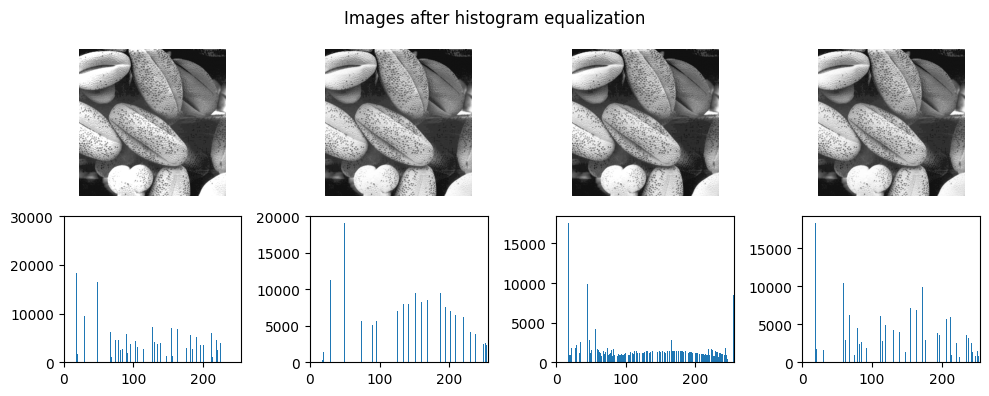

In [4]:
im1_eq = histogramEqualization(im1)
im2_eq = histogramEqualization(im2)
im3_eq = histogramEqualization(im3)
im4_eq = histogramEqualization(im4)

## Plot the images and their histograms:
fig2,ax2 = plt.subplots(2,4, figsize=(10,4))

ax2[0,0].imshow(im1_eq, cmap="gray", vmin=0, vmax=255)
ax2[0,1].imshow(im2_eq, cmap="gray", vmin=0, vmax=255)
ax2[0,2].imshow(im3_eq, cmap="gray", vmin=0, vmax=255)
ax2[0,3].imshow(im4_eq, cmap="gray", vmin=0, vmax=255)

ax2[1,0].hist(im1_eq.flatten(), bins=255)
ax2[1,1].hist(im2_eq.flatten(), bins=255)
ax2[1,2].hist(im3_eq.flatten(), bins=255)
ax2[1,3].hist(im4_eq.flatten(), bins=255)

for a in ax2[0,:]: a.set_axis_off()
for a in ax2[1,:]: a.set_xlim(0, 255)
fig2.suptitle("Images after histogram equalization")
plt.tight_layout()

plt.show()